
# EDA — Desigualdad Educativa (Muestra)
**Objetivo:** Crear un análisis exploratorio rápido y reproducible sobre los datos tidy para el proyecto de *Desigualdad Educativa en Sonora*.

> **Notas**
> - Esta libreta está pensada para correrla tal cual.  
> - Usa únicamente **Matplotlib** (sin Seaborn) para cumplir restricciones de entorno.  
> - Se detectan **valores faltantes**, **outliers** (Z-score e IQR), **correlaciones**, y se incluyen reducciones de dimensionalidad (**PCA** y **t-SNE**) sobre columnas numéricas.



## 1) Carga de datos y configuración
- Ajusta la ruta `CSV_PATH` si vas a correrla en otra carpeta.
- Se infieren tipos de columnas y se intenta detectar columnas de fecha.


In [4]:

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Carga
df = pd.read_csv(CSV_PATH, low_memory=False)
print("✅ Cargado:", CSV_PATH)
print("Shape:", df.shape)

# Vista rápida
display(df.head(3))

# Detección de columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nColumnas numéricas (", len(numeric_cols), "):", numeric_cols[:15], ("..." if len(numeric_cols)>15 else ""))
print("Columnas categóricas (", len(categorical_cols), "):", categorical_cols[:15], ("..." if len(categorical_cols)>15 else ""))


✅ Cargado: muestra_sep_datos_tidy.csv
Shape: (1000, 157)


,entidad,n_entidad,municipio,n_municipi,localidad,n_localidad,domicilio,clavecct,n_cct,turno,...,doc_2,doc_3,doc_4,doc_5,doc_6,doc_mg,doc_tot,tipo_org_docente,tipo_org_alumnos,periodo_escolar
0,15,MÉXICO,14,ATLACOMULCO,46,SAN JOSÉ TOXI,CALLE CARRETERA ATLACOMULCO A SAN JOSE TOXI,15EJN0225O,CLAUDIO DEBUSSY,1,...,1,1,0,0,0,1,3,MULTIGRADO,COMPLETA,2021-2022
1,21,PUEBLA,147,SANTA INÉS AHUATEMPAN,4,SAN JUAN NEPOMUCENO,CALLE 5 DE MAYO,21ETV0645Y,MODESTO VIDAL,1,...,1,1,0,0,0,0,4,COMPLEMENTARIA,NO APLICA EN ESTE NIVEL,2019-2020
2,13,HIDALGO,71,TLAHUILTEPA,22,LAS PILAS,NINGUNO NINGUNO,13KTV0158I,SECUNDARIA COMUNITARIA,1,...,0,0,0,0,0,1,1,MULTIGRADO,NO APLICA EN ESTE NIVEL,2019-2020



Columnas numéricas ( 140 ): ['entidad', 'municipio', 'localidad', 'turno', 'insc_t', 'hom_t', 'muj_t', 'insc_1', 'hom_1', 'muj_1', 'insc_2', 'hom_2', 'muj_2', 'insc_3', 'hom_3'] ...
Columnas categóricas ( 17 ): ['n_entidad', 'n_municipi', 'n_localidad', 'domicilio', 'clavecct', 'n_cct', 'n_turno', 'tipo', 'nivel', 'subnivel', 'c_caracterizan2', 'control', 'subcontrol', 'periodo', 'tipo_org_docente'] ...



## 2) Exploración rápida (QuickScan)
- Estructura, tipos, estadísticas descriptivas.
- Conteo de categorías en variables categóricas (top-n).


In [5]:

print("=== INFO ===")
print(df.info())

print("\n=== DESCRIPTIVE (numeric) ===")
display(df.describe(include=[np.number]).T)

print("\n=== DESCRIPTIVE (categorical) ===")
# Frecuencias para primeras 10 columnas categóricas
top_n = 10
for c in categorical_cols[:10]:
    print(f"\n-- {c} --")
    display(df[c].value_counts(dropna=False).head(15).to_frame("count"))


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 157 entries, entidad to periodo_escolar
dtypes: int64(140), object(17)
memory usage: 1.2+ MB
None

=== DESCRIPTIVE (numeric) ===


,count,mean,std,min,25%,50%,75%,max
entidad,1000.0,17.472,7.816157,1.0,12.0,16.0,24.0,32.0
municipio,1000.0,61.042,79.617455,1.0,13.0,38.0,77.0,549.0
localidad,1000.0,70.612,179.512005,1.0,1.0,10.0,54.0,2183.0
turno,1000.0,1.139,0.501927,1.0,1.0,1.0,1.0,5.0
insc_t,1000.0,109.922,137.080578,1.0,20.0,53.0,144.0,922.0
...,...,...,...,...,...,...,...,...
doc_4,1000.0,0.343,0.730674,0.0,0.0,0.0,0.0,4.0
doc_5,1000.0,0.335,0.713642,0.0,0.0,0.0,0.0,4.0
doc_6,1000.0,0.334,0.714811,0.0,0.0,0.0,0.0,4.0
doc_mg,1000.0,0.640,0.957767,0.0,0.0,0.0,1.0,15.0



=== DESCRIPTIVE (categorical) ===

-- n_entidad --


,count
n_entidad,
MÉXICO,87
VERACRUZ DE IGNACIO DE LA LLAVE,86
OAXACA,75
CHIAPAS,74
MICHOACÁN DE OCAMPO,59
GUANAJUATO,58
PUEBLA,56
JALISCO,50
GUERRERO,44



-- n_municipi --


,count
n_municipi,
LEÓN,13
GUADALAJARA,10
PUEBLA,9
NEZAHUALCÓYOTL,8
GUADALUPE,8
JUÁREZ,8
TORREÓN,6
CUERNAVACA,6
BENITO JUÁREZ,6



-- n_localidad --


,count
n_localidad,
GUADALAJARA,10
HEROICA PUEBLA DE ZARAGOZA,9
LEÓN DE LOS ALDAMA,9
CIUDAD NEZAHUALCÓYOTL,8
GUADALUPE,8
TIJUANA,6
CUERNAVACA,6
JUÁREZ,6
CANCÚN,6



-- domicilio --


,count
domicilio,
NINGUNO NINGUNO,242
CALLE CONOCIDO,20
CALLE PRINCIPAL,14
CALLE NINGUNO,14
CALLE HIDALGO,7
CALLE CENTRO,6
CALLE 5 DE MAYO,6
CALLE 16 DE SEPTIEMBRE,5
CALLE PLAZA PRINCIPAL,4



-- clavecct --


,count
clavecct,
21DPB0750J,2
17PPR0551D,1
11DPR1679Q,1
09PES0010T,1
31PPR0370N,1
15EJN0225O,1
21ETV0645Y,1
15EPR4012D,1
25PJN0229X,1



-- n_cct --


,count
n_cct,
PREESCOLAR COMUNITARIO,25
TELESECUNDARIA,14
CURSO COMUNITARIO,12
EMILIANO ZAPATA,11
CUAUHTEMOC,10
SECUNDARIA COMUNITARIA,9
MIGUEL HIDALGO,9
BENITO JUAREZ,9
VICENTE GUERRERO,8



-- n_turno --


,count
n_turno,
MATUTINO,903
VESPERTINO,77
DISCONTINUO,18
CONTINUO,2



-- tipo --


,count
tipo,
BASICA,1000



-- nivel --


,count
nivel,
PRIMARIA,418
PREESCOLAR,362
SECUNDARIA,197
INICIAL,23



-- subnivel --


,count
subnivel,
PRIMARIA GENERAL,340
PREESCOLAR GENERAL,244
TELESECUNDARIA,86
PREESCOLAR CONAFE,79
SECUNDARIA GENERAL,65
PRIMARIA INDIGENA,41
PRIMARIA CONAFE,37
PREESCOLAR INDIGENA,33
SECUNDARIA TECNICA,27



## 3) Valores faltantes
Se muestra el total y porcentaje por columna, y un gráfico de las 20 columnas con más faltantes.


,missing,missing_pct


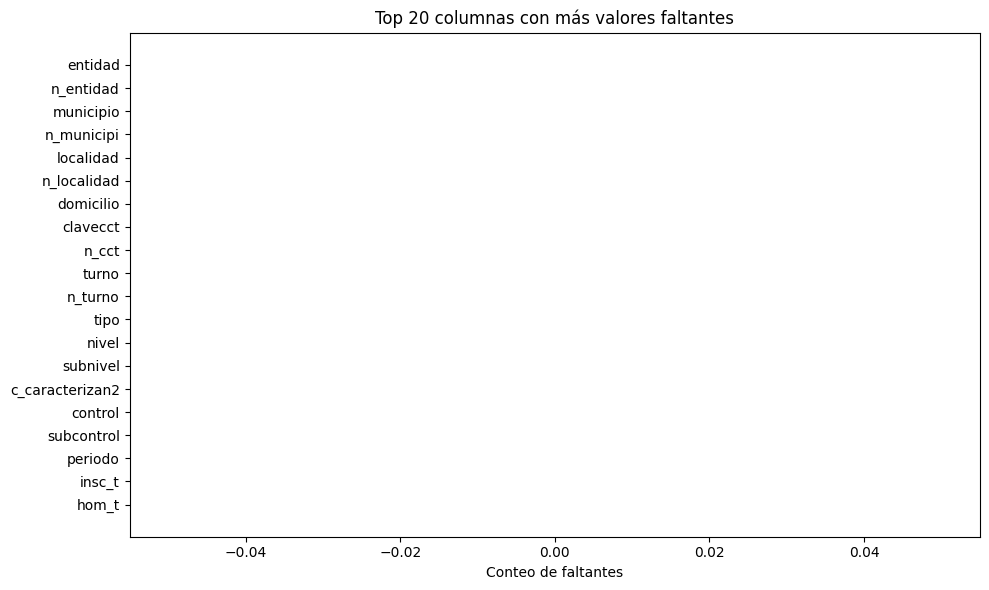

In [6]:

missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({"missing": missing, "missing_pct": missing_pct})
display(missing_df[missing_df["missing"]>0].head(30))

# Plot top-20 missing
top = missing_df.sort_values("missing", ascending=False).head(20)
if not top.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(top.index, top["missing"])
    plt.gca().invert_yaxis()
    plt.title("Top 20 columnas con más valores faltantes")
    plt.xlabel("Conteo de faltantes")
    plt.tight_layout()
    plt.show()



## 4) Outliers (Z-score e IQR)
Se calculan outliers por dos métodos clásicos:
- **Z-score**: |z| > 3
- **IQR**: Fuera de \[Q1 - 1.5·IQR, Q3 + 1.5·IQR\]


In [8]:
!uv add scipy

Resolved 114 packages in 365ms
Prepared 1 package in 1m 03s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 2.22s
 + scipy==1.16.3


,zscore_outliers,iqr_outliers
ins_6,32,164
ing_6,32,164
hom_6,29,164
insc_6,32,164
ing_4,29,163
insc_4,29,163
ins_4,29,163
muj_4,29,160
ins_5,31,158
insc_5,31,158


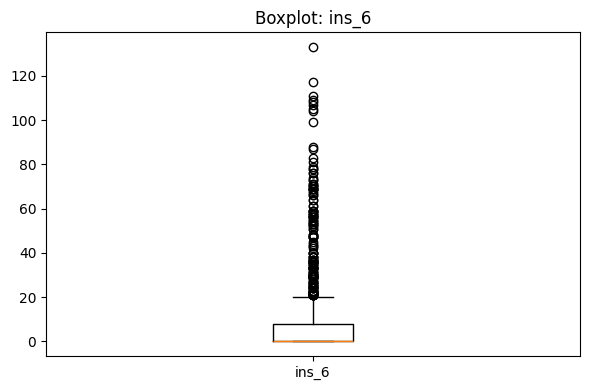

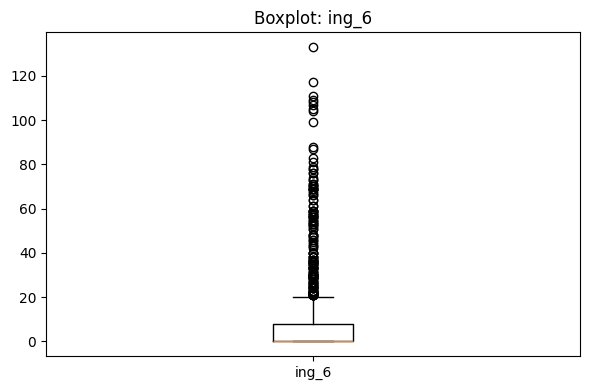

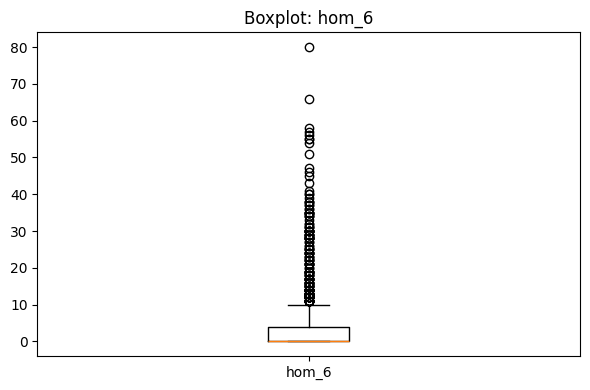

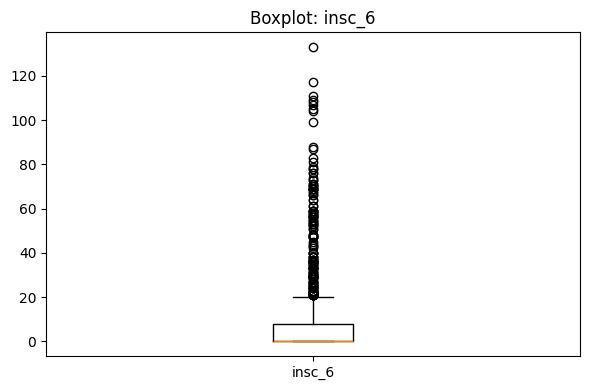

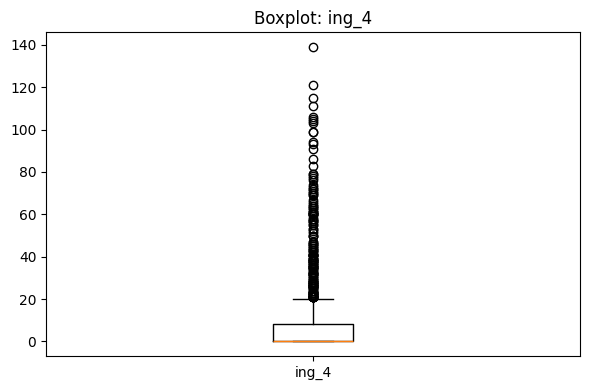

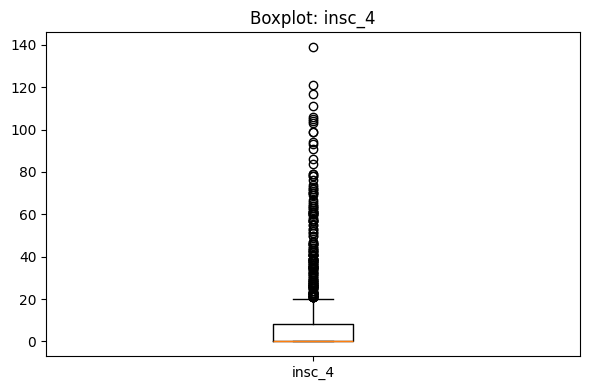

In [11]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aseguramos columnas numéricas válidas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if df[c].notna().any()]

outlier_report = []

# --- Z-score por columna (robusto a std=0) ---
z_outliers = {}
if numeric_cols:
    sub = df[numeric_cols].copy()
    # Convertimos a float por si hay tipos raros
    sub = sub.apply(pd.to_numeric, errors='coerce')

    means = sub.mean()
    stds = sub.std(ddof=0)  # ddof=0 para evitar NaN con n=1
    stds_replaced = stds.replace(0, np.nan)  # evita división por cero

    z = (sub - means) / stds_replaced
    abs_z = z.abs()

    # Conteo de outliers por umbral |z| > 3
    z_outliers = (abs_z > 3).sum().to_dict()
else:
    z_outliers = {}

# --- IQR por columna ---
iqr_outliers = {}
for c in numeric_cols:
    series = pd.to_numeric(df[c], errors='coerce').dropna()
    if series.empty:
        iqr_outliers[c] = 0
        continue
    q1, q3 = np.percentile(series, 25), np.percentile(series, 75)
    iqr = q3 - q1
    if iqr == 0:
        iqr_outliers[c] = 0
        continue
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_outliers[c] = int(((series < lower) | (series > upper)).sum())

# --- Tabla resumen ---
outliers_df = pd.DataFrame({
    "zscore_outliers": pd.Series(z_outliers),
    "iqr_outliers": pd.Series(iqr_outliers)
}).fillna(0).astype(int).sort_values("iqr_outliers", ascending=False)

display(outliers_df.head(20))

# --- Boxplots de las 6 con más outliers (IQR) ---
top_cols = outliers_df.sort_values("iqr_outliers", ascending=False).head(6).index.tolist()
if top_cols:
    for col in top_cols:
        vals = pd.to_numeric(df[col], errors='coerce').dropna().values
        if vals.size == 0:
            continue
        plt.figure(figsize=(6, 4))
        plt.boxplot(vals, vert=True, labels=[col])
        plt.title(f"Boxplot: {col}")
        plt.tight_layout()
        plt.show()
else:
    print("No se encontraron columnas con outliers según el método IQR.")



## 5) Relaciones entre variables y correlaciones
- **Scatter Matrix** para hasta 6 columnas numéricas (selección simple).
- **Matriz de correlación** (Pearson) sobre columnas numéricas.


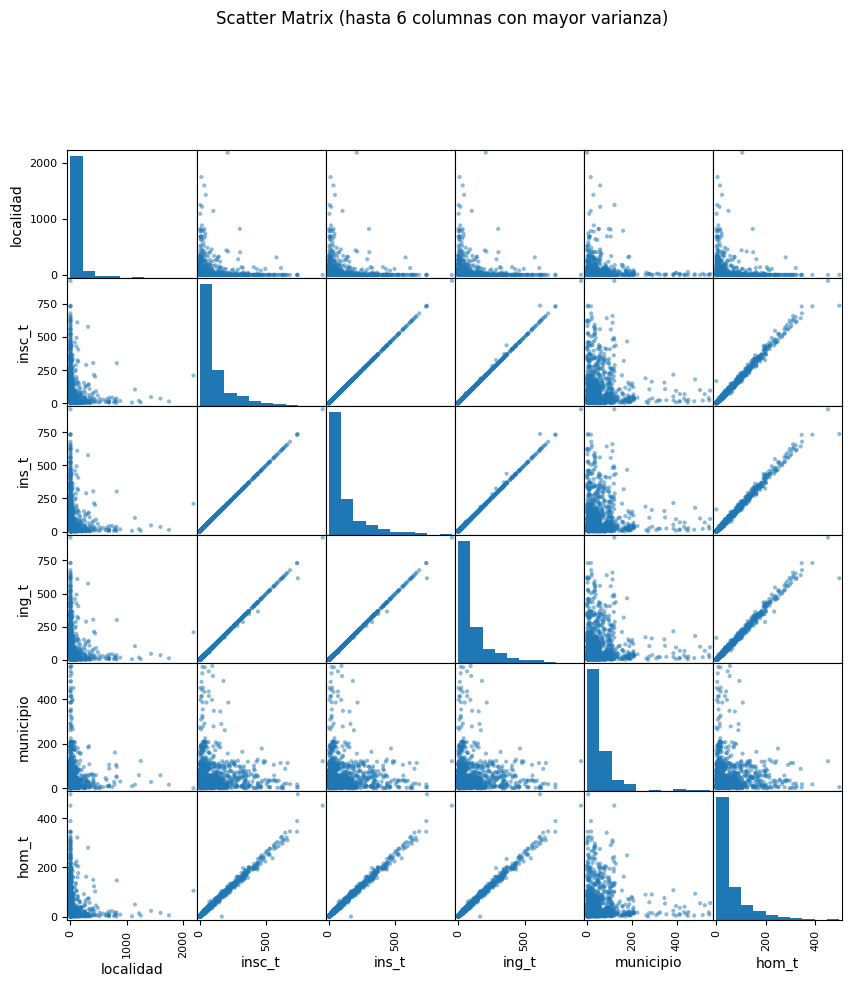

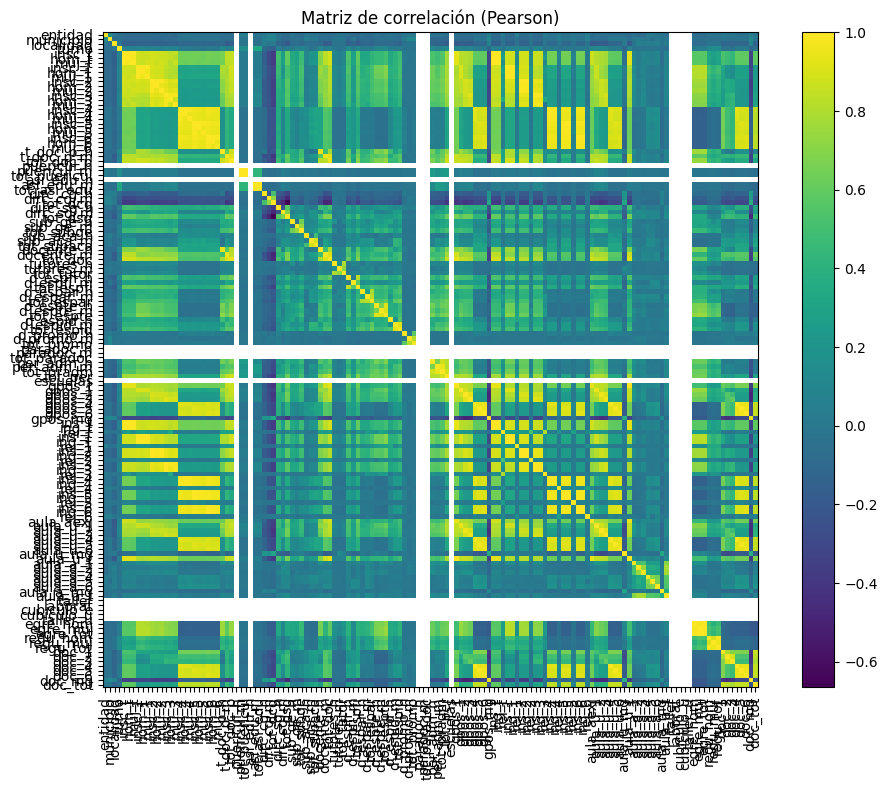


Top correlaciones absolutas:


,,corr
ins_3,insc_3,1.000000
ins_t,insc_t,1.000000
ins_1,insc_1,1.000000
ins_4,insc_4,1.000000
ins_5,insc_5,1.000000
tot_asi_edu,asi_edu_m,1.000000
doc_4,gpos_4,1.000000
ins_6,insc_6,1.000000
tot_puericul,puericul_m,1.000000
ins_2,insc_2,1.000000


In [12]:

from pandas.plotting import scatter_matrix

# Tomamos hasta 6 columnas numéricas con mayor varianza (si es posible)
var_series = df[numeric_cols].var().sort_values(ascending=False) if numeric_cols else pd.Series(dtype=float)
sel_cols = var_series.head(6).index.tolist() if not var_series.empty else []

if len(sel_cols) >= 2:
    axs = scatter_matrix(df[sel_cols].dropna(), figsize=(10, 10), diagonal='hist')
    # Ajuste de títulos
    plt.suptitle("Scatter Matrix (hasta 6 columnas con mayor varianza)", y=1.02)
    plt.show()

# Correlación
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(corr, interpolation='nearest')
    plt.title("Matriz de correlación (Pearson)")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()

    # Top correlaciones (pares) sin duplicados
    corr_unstack = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).unstack().dropna()
    print("\nTop correlaciones absolutas:")
    display(corr_unstack.reindex(corr_unstack.abs().sort_values(ascending=False).index).head(15).to_frame("corr"))



## 6) Reducción de dimensionalidad (PCA y t-SNE)
Se estandarizan las columnas numéricas y se visualiza en 2D:
- **PCA (2 componentes)**  
- **t-SNE (2 componentes)** — se limita el número de muestras si el dataset es grande para evitar tiempos de cómputo elevados.


In [16]:
!uv add scikit-learn

Resolved 117 packages in 1.30s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 3 packages in 2.82s
 + joblib==1.5.2
 + scikit-learn==1.7.2
 + threadpoolctl==3.6.0


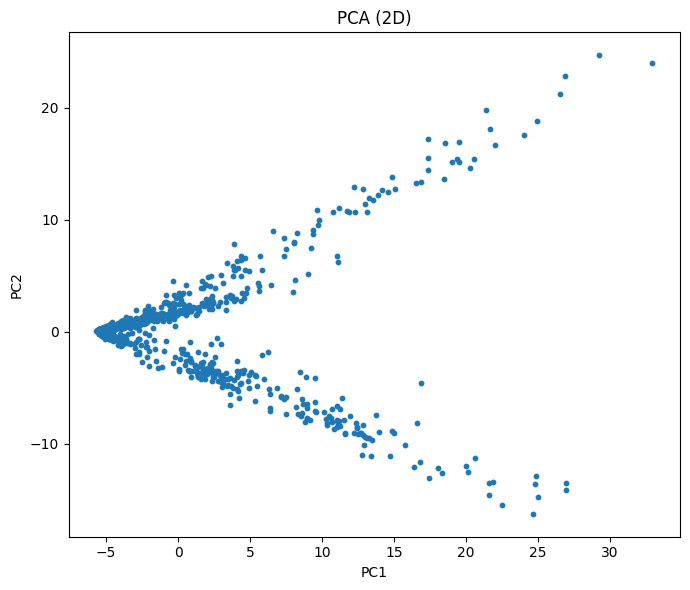

Explained variance ratio: [0.35588678 0.16581873]


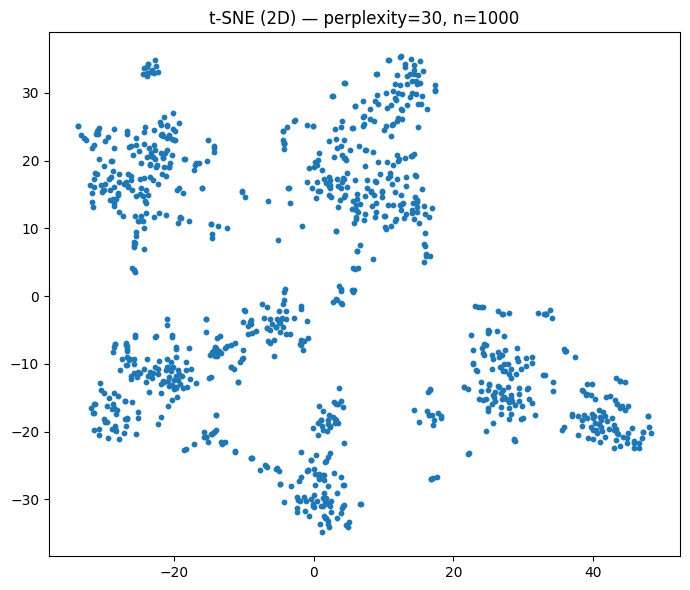

In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = df[numeric_cols].dropna().values if numeric_cols else None

if X is not None and X.shape[1] >= 2:
    # Estandarización
    Xs = StandardScaler().fit_transform(X)

    # PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(Xs)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
    plt.title("PCA (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()

    print("Explained variance ratio:", pca.explained_variance_ratio_)

    # t-SNE (limitamos muestras para rendimiento)
    n_samples = Xs.shape[0]
    max_tsne = 3000
    if n_samples > max_tsne:
        idx = np.random.RandomState(42).choice(n_samples, size=max_tsne, replace=False)
        X_tsne_input = Xs[idx]
    else:
        X_tsne_input = Xs

    # Perplexity debe ser menor que n_samples; se ajusta automáticamente
    perplexity = max(5, min(30, X_tsne_input.shape[0] // 10))
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate="auto", init="pca", random_state=42)
    X_tsne = tsne.fit_transform(X_tsne_input)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
    plt.title(f"t-SNE (2D) — perplexity={perplexity}, n={X_tsne_input.shape[0]}")
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas numéricas para ejecutar PCA/t-SNE.")



## 7) Consulta con usuarios
> Preguntas para recolectar retroalimentación de los usuarios del dashboard/producto:
- ¿Qué **métricas** o **indicadores** son más relevantes para su toma de decisiones?
- ¿Qué **niveles de agregación** requieren (municipio, zona, escuela, nivel educativo)?
- ¿Qué periodos de tiempo necesitan comparar? (anual, semestral, mensual)
- ¿Qué **filtros** consideran indispensables (público/privado, modalidad, turno, etc.)?
- ¿Qué visualizaciones les resultan más claras?
- ¿Hay **datos externos** que valga la pena integrar (contexto socioeconómico, etc.)?



## 8) Siguientes pasos
- Completar el EDA con variables **objetivo** específicas (definir target si se planea modelado).
- Documentar **suposiciones** y **limitaciones** detectadas.
- Probar con la **base completa** (`sep_datos_tidy.csv`) y comparar patrones.
- Generar un **dashboard** inicial (ej. Streamlit/Panel) con los gráficos más útiles para usuarios.


In [2]:
!uv add seaborn

Resolved 113 packages in 1.48s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 331ms
 + seaborn==0.13.2


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. CREA LA TABLA PIVOTE (La tabla de tu segunda imagen) ---
# Esto transforma los datos 'largos' a 'anchos', perfectos para graficar
df_para_plotear = df_sep.pivot_table(
    index='ciclo', 
    columns='sostenimiento', 
    values='alumnos', 
    aggfunc='sum'
)

# Rellenamos con 0 si hay algún ciclo sin datos en una categoría
df_para_plotear = df_para_plotear.fillna(0)

print("Tabla generada (la que usaremos para la gráfica):")
print(df_para_plotear)

# --- 2. CREA LA GRÁFICA DE LÍNEAS ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7)) # Tamaño de la figura

# Graficamos solo las dos columnas que nos interesan
sns.lineplot(data=df_para_plotear[['PUBLICO', 'PRIVADO']], marker='o', linewidth=2.5)

plt.title('Evolución de Matrícula Pública vs. Privada en Sonora', fontsize=16)
plt.xlabel('Ciclo Escolar', fontsize=12)
plt.ylabel('Número Total de Alumnos', fontsize=12)
plt.legend(title='Sostenimiento', loc='upper left')

# Guardamos la gráfica en la carpeta de reportes para usarla después
ruta_guardado = '../reports/figures/evolucion_matricula_publica_privada.png'
plt.savefig(ruta_guardado)
print(f"\nGráfica guardada en: {ruta_guardado}")

plt.show() # Muestra la gráfica en la libreta

NameError: name 'df_sep' is not defined